## 0a

In [2]:
from pathlib import Path
import os
import fuzzywuzzy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import shutil
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Inställning av sökvägar
data_path = Path().absolute().parent
train_path = data_path / "Lab2"/ "experiment_small_data" / "train"
val_path = data_path / "Lab2"/ "experiment_small_data" / "val"
test_path = data_path / "Lab2"/ "experiment_small_data" / "test"
print(f"Data path1: {data_path}")
print(f"Train path1: {train_path}")
print(f"Validation path1: {val_path}")
print(f"Test path1: {test_path}")

# Anpassar sökvägarna för körning i Kaggle
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent /"input"
    train_path = data_path / "train-data"
    val_path = data_path / "val-data"
    test_path = data_path / "test-data"

# Skriver ut sökvägarna för att bekräfta att de är rätt
print(f"Data path: {data_path}")
print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")

Data path1: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs
Train path1: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Validation path1: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\val
Test path1: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\test
Data path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs
Train path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Validation path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\val
Test path: c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\test


## 0b

Number of files found: 1600


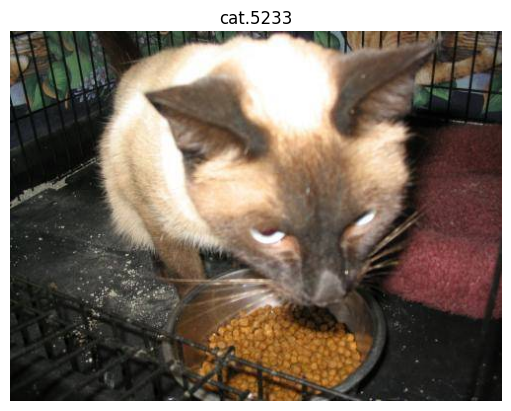

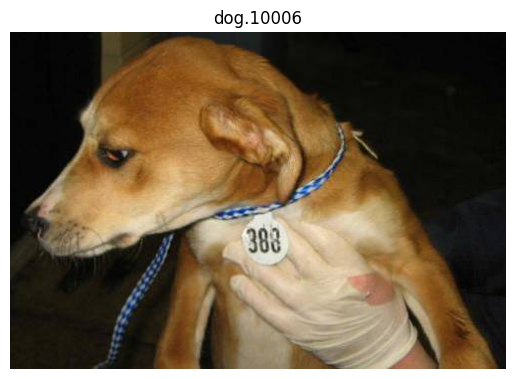

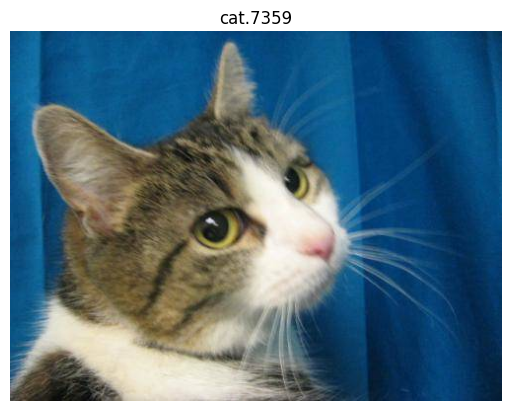

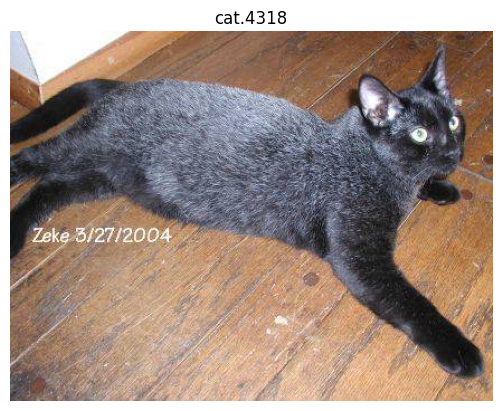

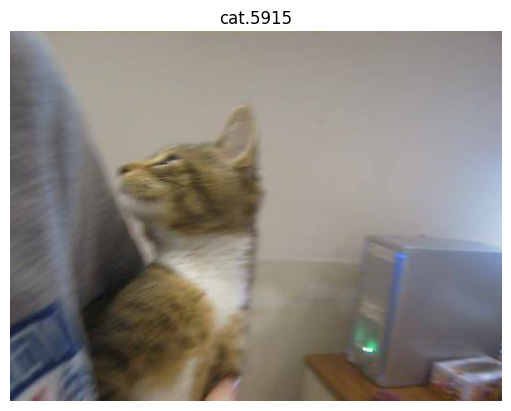

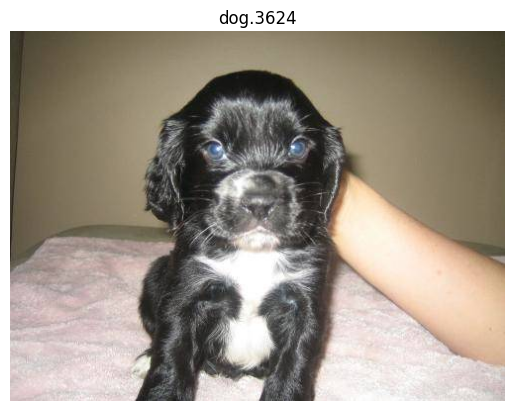

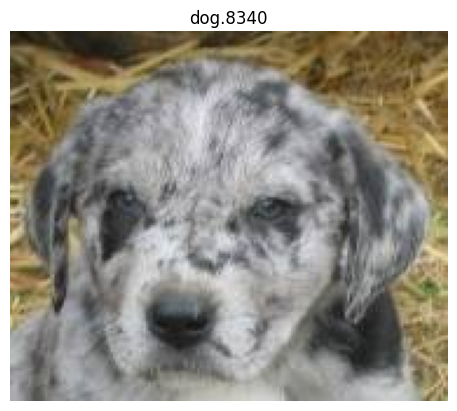

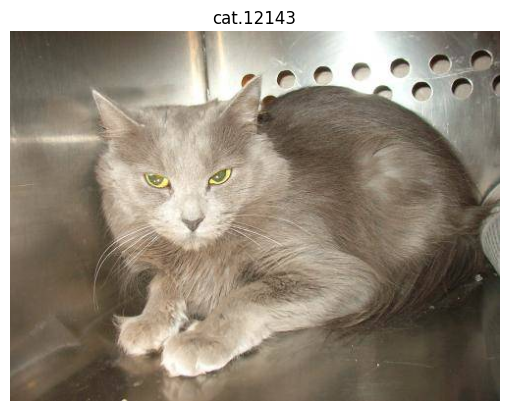

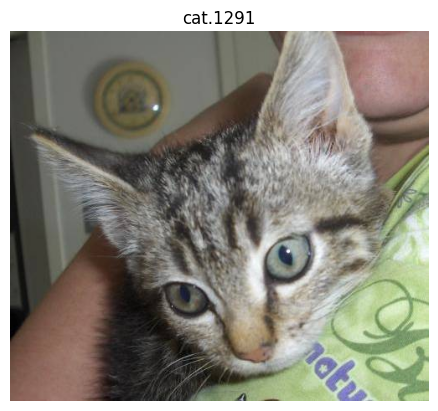

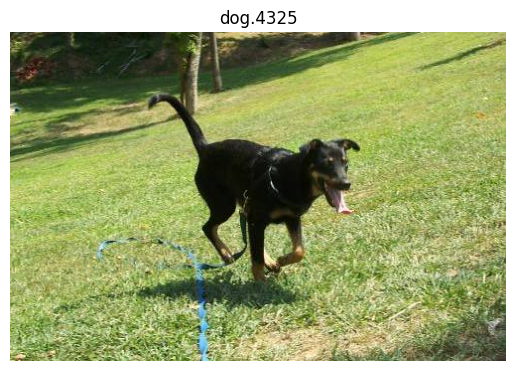

In [4]:

# Listar alla filer i mappen
train_files = list(train_path.glob('*'))
print(f"Number of files found: {len(train_files)}")

# Väljer slumpmässigt 10 filer från listan
random_img = random.sample(train_files, 10)

# Loopar genom de slumpmässigt utvalda bilderna
for image_file in random_img:
    # skriver ut bilderna 
    image = plt.imread(image_file)
    
    # Tar fram filnamnet (label)
    label = image_file.stem
    
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()


## 0c

In [5]:
# Skapar mappar för uppdelning om de inte redan finns
folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
           ('experiment_tiny_data', ['test', 'train', 'val']),
           ('original_data', ['test', 'train'])]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

## 0d

In [6]:

# Skapar train, val och test mappar om de inte redan finns
small_test = test_path
small_train = train_path
small_val = val_path
original_data = data_path / "Lab2"/ "original_data" / "train"

print(data_path)
print(test_path)

# Antal exempel för varje delmängd
train_size = 1600
val_size = 400
test_size = 500

# Antal exempel för varje klass
dogs_train_size = 800
cats_train_size = 800
dogs_val_size = 200
cats_val_size = 200
dogs_test_size = 250
cats_test_size = 250

# Listar alla bilder för hundar och katter i originaldatasetet
cat_images = list(original_data.glob('cat*.jpg'))
dog_images = list(original_data.glob('dog*.jpg'))

print(len(dog_images))
print(len(cat_images))

# Kontrollfunktion för att se om mapparna redan är fyllda
def check_files(folder, size):
    return len(list(folder.glob('*.jpg'))) >= size

# Funktion för att dela upp och kopiera filer
def distribute_files(source, train_num, val_num, test_num, train_folder, val_folder, test_folder):
    if not (check_files(train_folder, train_num) and check_files(val_folder, val_num) and check_files(test_folder, test_num)):
        images = list(source.glob('*.jpg'))
        random.shuffle(images)
        train = images[:train_num]
        val = images[train_num:train_num + val_num]
        test = images[train_num + val_num:train_num + val_num + test_num]

        for img in train:
            shutil.copy(img, train_folder)
        for img in val:
            shutil.copy(img, val_folder)
        for img in test:
            shutil.copy(img, test_folder)
        print("Files have been allocated and copied.")
    else:
        print("Files are already distributed.")

# Distribuera hund- och kattbilder
distribute_files(original_data / 'dog', dogs_train_size, dogs_val_size, dogs_test_size, small_train, small_val, small_test)
distribute_files(original_data / 'cat', cats_train_size, cats_val_size, cats_test_size, small_train, small_val, small_test)

print("Train|val|test-split har genomförts och datan har sparats i sina respektive mappar.")

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs
c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\test


'\n# Listar alla bilder för hundar och katter i originaldatasetet\ncat_images = list(original_data.glob(\'cat*.jpg\'))\ndog_images = list(original_data.glob(\'dog*.jpg\'))\n\nprint(len(dog_images))\nprint(len(cat_images))\n\n# Kontrollfunktion för att se om mapparna redan är fyllda\ndef check_files(folder, size):\n    return len(list(folder.glob(\'*.jpg\'))) >= size\n\n# Funktion för att dela upp och kopiera filer\ndef distribute_files(source, train_num, val_num, test_num, train_folder, val_folder, test_folder):\n    if not (check_files(train_folder, train_num) and check_files(val_folder, val_num) and check_files(test_folder, test_num)):\n        images = list(source.glob(\'*.jpg\'))\n        random.shuffle(images)\n        train = images[:train_num]\n        val = images[train_num:train_num + val_num]\n        test = images[train_num + val_num:train_num + val_num + test_num]\n\n        for img in train:\n            shutil.copy(img, train_folder)\n        for img in val:\n            

In [7]:
#Använder denna som check men låter den vara utkommenterad då den ger så mycket information.

# Loopar igenom alla filer i mappen och skriver ut deras attribut
for file in train_path.iterdir():
    #print(f"File Name: {file.name}")
    #print(f"File Type: {'File' if file.is_file() else 'Directory'}")
    #print(f"File Size: {file.stat().st_size} bytes")
    #print(f"File Creation Time: {file.stat().st_ctime}")
    #print(f"File Modification Time: {file.stat().st_mtime}")
    # Extraherar labelsvektorn från filnamnet (om den finns)
    labels_vector = file.name.split('_')[-1].split('.')[0]
    #print(f"File Label Vector: {labels_vector}")

## 0e

                                          image_path
0  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
1  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
2  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
3  c:\Users\Sandra\Documents\Github\AI-Sandra-And...
4  c:\Users\Sandra\Documents\Github\AI-Sandra-And...


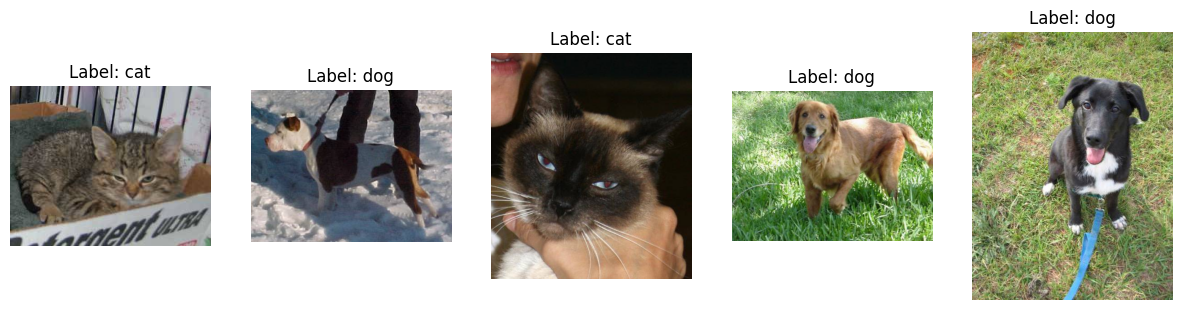

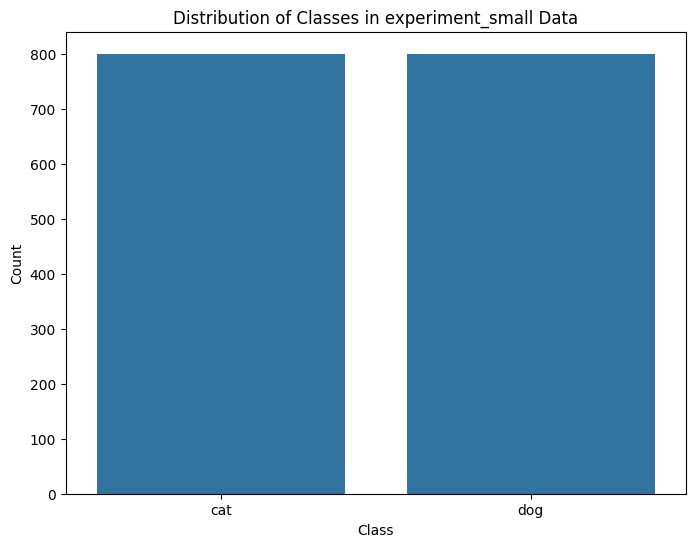

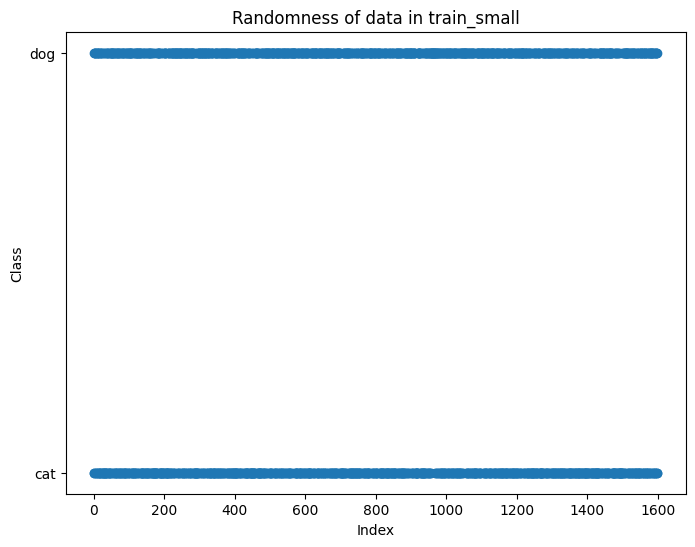

In [8]:
# Listar filer i mappen med filtillägget .jpg
image_files = list(train_path.glob('*.jpg'))

# Skapar en DataFrame med filvägarna
small_train_data = pd.DataFrame({'image_path': [str(file) for file in image_files]})

# Visar de första raderna i datasetet för att kontrollera att det har lästs in korrekt
print(small_train_data.head())

# Plockar ut labelsvektorerna
# Lägger till en kolumn 'label' för att simulera datasetets struktur
small_train_data['label'] = ['cat' if 'cat' in file else 'dog' for file in small_train_data['image_path']]
one_hot_encoded_labels = pd.get_dummies(small_train_data['label'])

# Lägger till labelsvektorerna till DataFramen
small_train_data = pd.concat([small_train_data, one_hot_encoded_labels], axis=1)

# Samplar slumpmässigt rader från DataFramen för att få en mer slumpad ordning
small_train_data = small_train_data.sample(frac=1).reset_index(drop=True)

# Plottar några bilder med deras respektive labels för att kontrollera att det är rätt
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (index, row) in enumerate(small_train_data.head().iterrows()):
    img = plt.imread(row['image_path'])
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {row['label']}")
    axes[i].axis('off')
plt.show()

# Skapar diagram för att kontrollera att datasetet är balanserat
# Plottar antalet förekomster av varje klass i datasetet
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=small_train_data)
plt.title('Distribution of Classes in experiment_small Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Skapar diagram för att kontrollera att datasetet är slumpat
# Kontrollerar fördelningen av klasser över index för att se så det inte finns något mönster
plt.figure(figsize=(8, 6))
plt.plot(small_train_data.index, small_train_data['label'], marker='o', linestyle='')
plt.title('Randomness of data in train_small')
plt.xlabel('Index')
plt.ylabel('Class')
plt.show()


# 1a

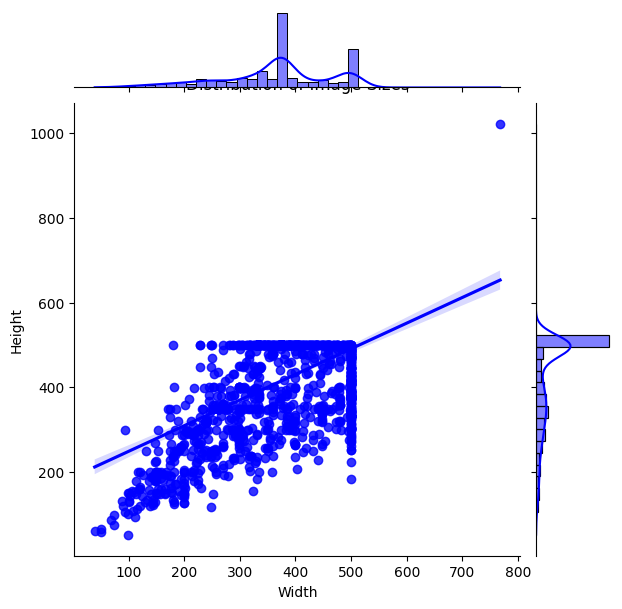

In [9]:
# Skapar en lista med bildbredd och bildhöjd
image_sizes = [(plt.imread(file).shape[0], plt.imread(file).shape[1]) for file in small_train_data['image_path']]

# Tar ut bildbredd och bildhöjd till separata listor
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Skapar en jointplot för att visualisera bildstorlekarna
sns.jointplot(x=widths, y=heights, kind='reg', color='blue')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes', pad=10)
plt.show()

# 1b och 1c

Här har jag sett att vi har några väldigt stora och några väldigt små bilder som troligtvis inte kommer att sscalas så bra, så jag väljer att ta bort dessa redan nu.

In [10]:
def prepare_images(data_path, min_size=(70, 30), max_size=(650, 600)):
    image_files = list(data_path.glob('*.jpg'))
    print(f"Found {len(image_files)} images in {data_path}")
    images = []
    labels = []

    for file in image_files:
        img = cv2.imread(str(file))
        if img is None:
            print(f"Failed to load image {file}")
            continue
        
        # Kontrollera bildstorleken
        if img.shape[0] < min_size[0] or img.shape[1] < min_size[1] or img.shape[0] > max_size[0] or img.shape[1] > max_size[1]:
            print(f"Skipping image {file} due to inappropriate size: {img.shape}")
            continue

        # Ändrar storleken på bilden till önskat format
        img = cv2.resize(img, (250, 200))  
        # Konverterar färgerna i bilderna från BGR till RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        images.append(img)
        label = 1 if 'dog' in file.stem else 0
        labels.append(label)
    
    images = np.array(images, dtype=np.float32) / 255.0
    labels = np.array(labels)
    return images, labels

X_train, y_train = prepare_images(small_train)
X_val, y_val = prepare_images(small_val)
X_test, y_test = prepare_images(small_test)

print(X_train)
print(y_train)
print(X_val)
print(y_val)
print(X_test)
print(y_test)

Found 1600 images in c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.4821.jpg due to inappropriate size: (39, 60, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.835.jpg due to inappropriate size: (768, 1023, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\cat.8504.jpg due to inappropriate size: (50, 66, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\dog.8450.jpg due to inappropriate size: (68, 86, 3)
Skipping image c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\labs\Lab2\experiment_small_data\train\dog.8570.jpg due to inappropriate size: (50, 59, 3)
Found 400 images in c:\Users\Sandra\Documents\Github\AI-Sand

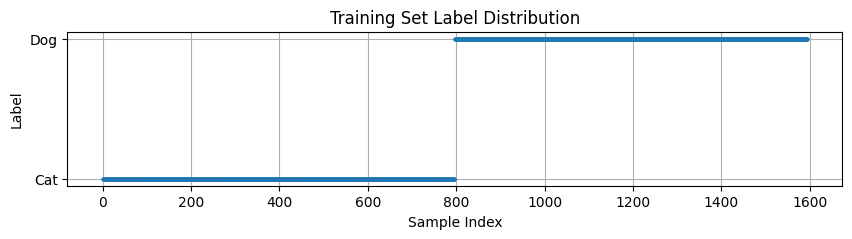

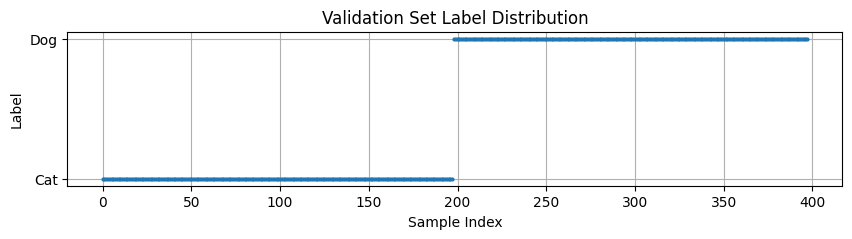

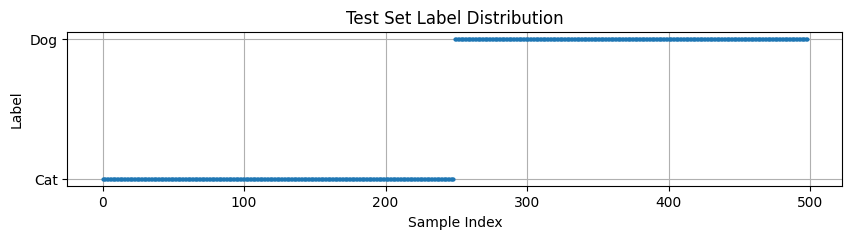

In [11]:
def plot_label_distribution(labels, title="Label Distribution"):
    plt.figure(figsize=(10, 2))
    plt.plot(labels, marker='o', linestyle='', markersize=2)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.yticks([0, 1], ['Cat', 'Dog'])
    plt.grid(True)
    plt.show()

# Anropar funktionen för att visa label-distribution för varje dataset
plot_label_distribution(y_train, title="Training Set Label Distribution")
plot_label_distribution(y_val, title="Validation Set Label Distribution")
plot_label_distribution(y_test, title="Test Set Label Distribution")


In [12]:
def shuffle_data(X, y):
    # Skapar en array med index från 0 till antalet exempel
    indices = np.arange(X.shape[0])
    # Här blandas indexen
    np.random.shuffle(indices)
    # Applicerar den blandade ordningen på både bilder och etiketter
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    return X_shuffled, y_shuffled

# Blandar träningsingsdatan
X_train, y_train = shuffle_data(X_train, y_train)

# Blandar valideringsdatan
X_val, y_val = shuffle_data(X_val, y_val)

# Blandar testdatan
X_test, y_test = shuffle_data(X_test, y_test)



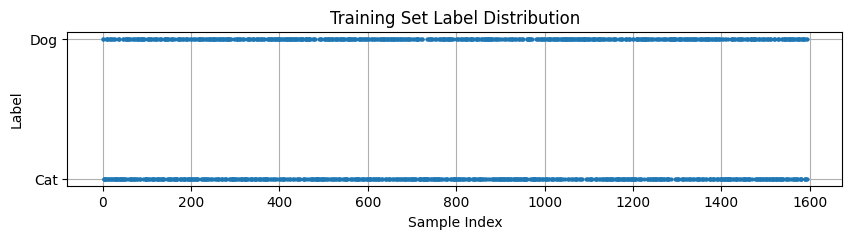

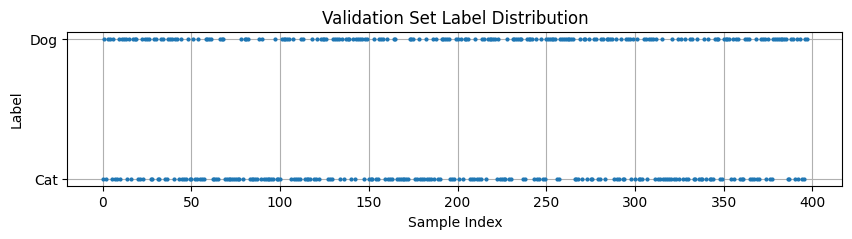

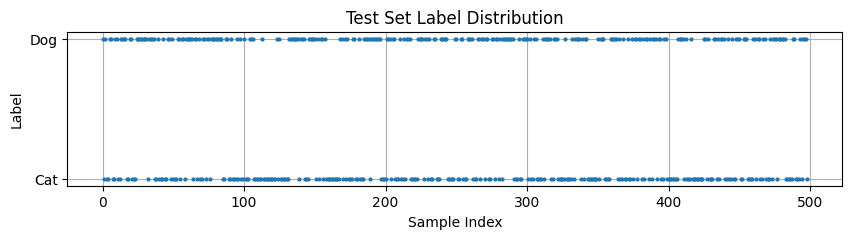

In [13]:
def plot_label_distribution(labels, title="Label Distribution"):
    plt.figure(figsize=(10, 2))
    plt.plot(labels, marker='o', linestyle='', markersize=2)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.yticks([0, 1], ['Cat', 'Dog'])
    plt.grid(True)
    plt.show()

# Anropar funktionen för att visa label-distribution
plot_label_distribution(y_train, title="Training Set Label Distribution")
plot_label_distribution(y_val, title="Validation Set Label Distribution")
plot_label_distribution(y_test, title="Test Set Label Distribution")


In [14]:
X_train.shape

(1595, 200, 250, 3)

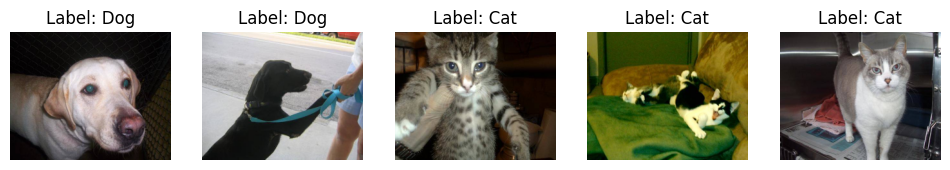

In [15]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(12, 2.4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title('Label: Dog' if labels[i] == 1 else 'Label: Cat')
        plt.axis('off')
    plt.show()

# Använder funktionen för att visa exempel från träningsdata
plot_sample_images(X_train, y_train)


In [16]:
y_train_onehot = to_categorical(y_train, num_classes=2)


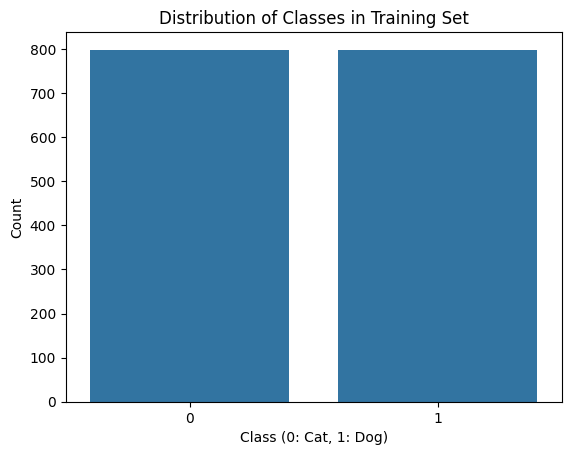

In [17]:
sns.countplot(x=np.argmax(y_train_onehot, axis=1))
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class (0: Cat, 1: Dog)')
plt.ylabel('Count')
plt.show()


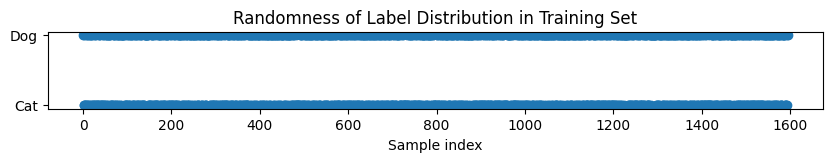

In [18]:
plt.figure(figsize=(10, 1))
plt.plot(np.argmax(y_train_onehot, axis=1), marker='o', linestyle='')
plt.title('Randomness of Label Distribution in Training Set')
plt.xlabel('Sample index')
plt.yticks([0, 1], ['Cat', 'Dog'])
plt.show()


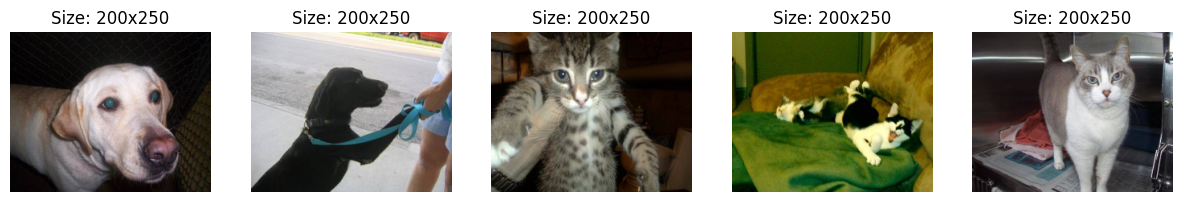

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, img in enumerate(X_train[:5]):
    axes[i].imshow(img)
    axes[i].set_title(f"Size: {img.shape[0]}x{img.shape[1]}")
    axes[i].axis('off')
plt.show()


## 1d

Augmentering används för att öka den mängd träningsdata man har att arbeta med genom att introducera variationer av befintlig data, vilket hjälper till att förbättra modellens generaliserbarhet och minskar även risken för överanpassning.

Jag har testat mig fram med olika parametrar men kom fram till att dessa fungerade bäst. Använde allt för hög rotation från början och fick inget bra resultat sen pratade jag men Björn som föreslog att jag skulle sänka den och då började resultaten förbättras. Använder ganska små skiftningar för att det det inte ska vara så kostsamt bland annat.

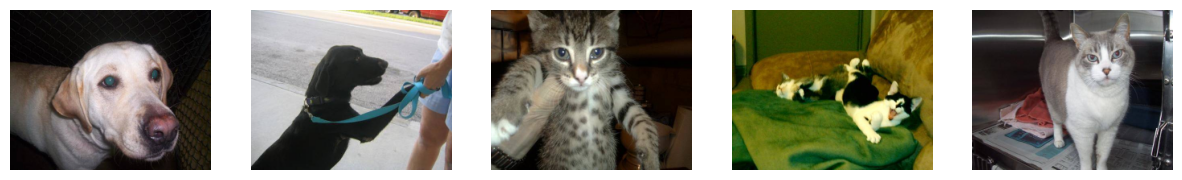

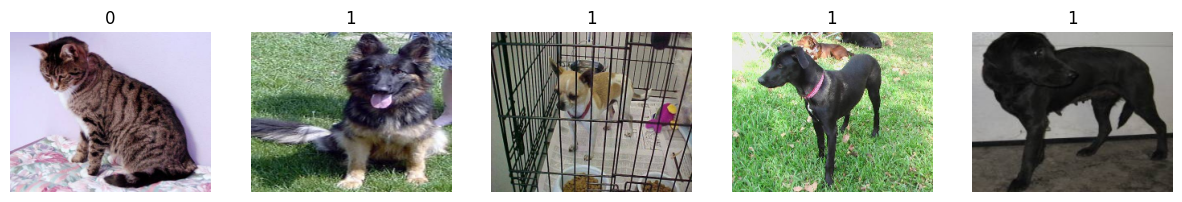

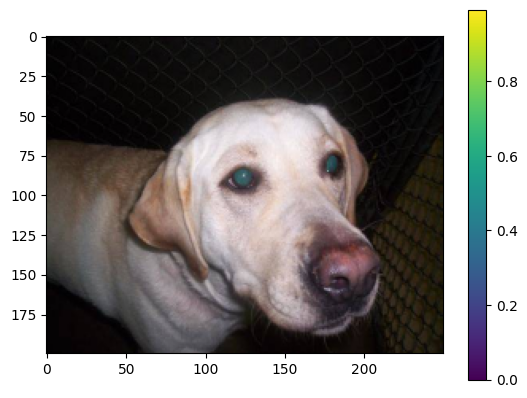

In [20]:
# Skapar en instans av ImageDataGenerator för data-augmentation
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Skapar en generator från de skaldade bilderna
image_data_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=5
)

# Visar några av de normaliserade bilderna innan augmentering
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(X_train[i])
    ax[i].axis('off')
plt.show()

def display_augmented_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in zip(range(num_images), axes):
        idx = np.random.randint(0, len(images))
        ax.imshow(images[idx])
        ax.set_title(f'{labels[idx]}')
        ax.axis('off')
    plt.show()
display_augmented_images(X_train, y_train)


plt.imshow(X_train[0])
plt.colorbar()
plt.show()


## 2a

# Första test utan augmentering

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.5146 - loss: 1.4505 - val_accuracy: 0.4975 - val_loss: 0.6912
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6088 - loss: 0.6795 - val_accuracy: 0.6181 - val_loss: 0.6831
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6550 - loss: 0.6258 - val_accuracy: 0.6106 - val_loss: 0.7014
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 991ms/step - accuracy: 0.7092 - loss: 0.5689 - val_accuracy: 0.6206 - val_loss: 0.6954
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 984ms/step - accuracy: 0.7996 - loss: 0.4331 - val_accuracy: 0.6055 - val_loss: 0.7618
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 917ms/step - accuracy: 0.8483 - loss: 0.3560 - val_accuracy: 0.6357 - val_loss: 0.9296
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 864ms/step - accuracy: 0.9004 - loss: 0.2563 - val_accuracy: 0.6407 - val_loss: 1.0163
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 862ms/step - accuracy: 0.9196 - loss: 0.2014 - val_accuracy: 0.6

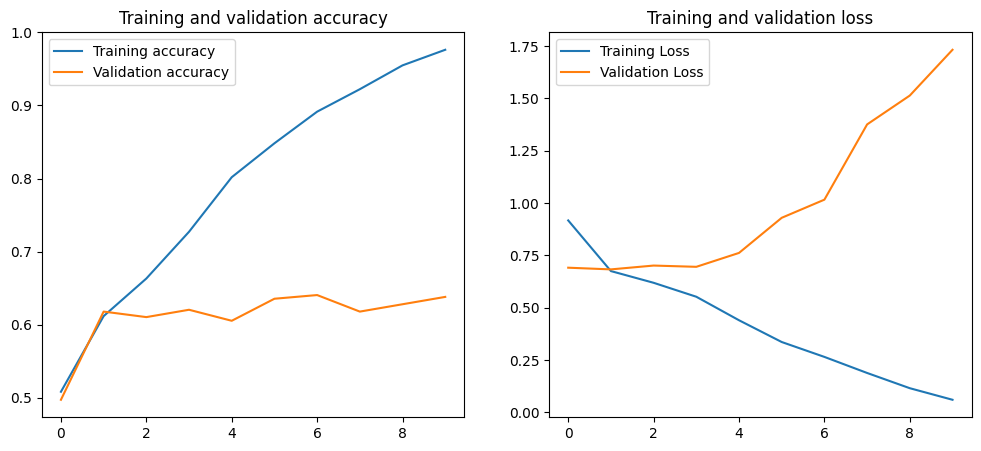

In [21]:
# Bygger en sequential model
def build_model():
    model = Sequential([
        Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model_plot = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Jämför modellen mot testdata
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(model_plot)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 884ms/step - accuracy: 0.9844 - loss: 0.0414 - val_accuracy: 0.6658 - val_loss: 1.9259
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 902ms/step - accuracy: 0.9807 - loss: 0.0701 - val_accuracy: 0.6307 - val_loss: 1.6489
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 891ms/step - accuracy: 0.9873 - loss: 0.0499 - val_accuracy: 0.6407 - val_loss: 1.8716
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 875ms/step - accuracy: 0.9968 - loss: 0.0166 - val_accuracy: 0.6357 - val_loss: 2.1607
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 881ms/step - accuracy: 0.9940 - loss: 0.0209 - val_accuracy: 0.6533 - val_loss: 1.7381
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 868ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.6156 - val_loss: 2.1498
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 874ms/step - accuracy: 0.9975 - loss: 0.0137 - val_accuracy: 0.6608 - val_loss: 2.1675
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


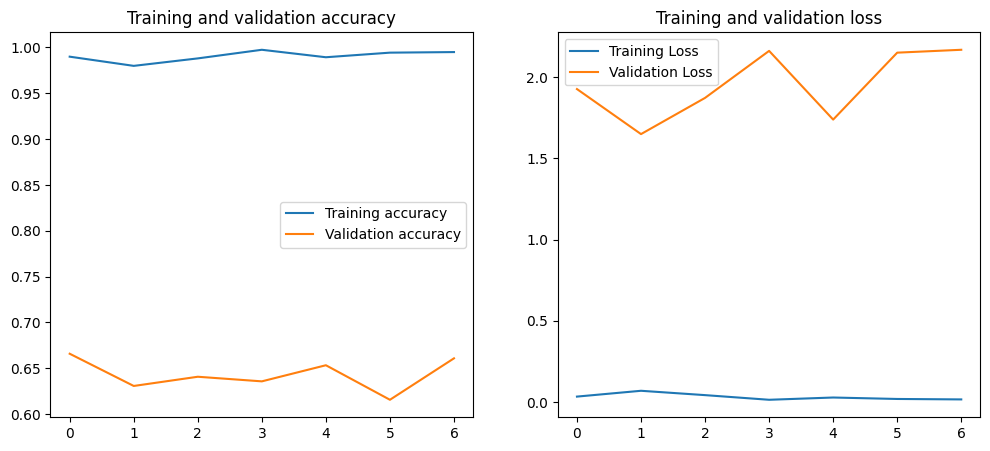

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.6617 - loss: 1.2659
Test Accuracy: 0.6533066034317017


In [22]:

# Definierar EarlyStopping callback
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Tränar modellen med EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

# Plottar träningshistoriken
plot_training_history(history)

# Jämför modellen mot testdatan efter träningen har stoppats tidigt
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


In [23]:
X_train

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.03137255, 0.03529412, 0.04313726],
         [0.03921569, 0.04705882, 0.06666667],
         [0.03137255, 0.04313726, 0.0627451 ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.03921569, 0.03921569, 0.04705882],
         [0.00784314, 0.01568628, 0.03529412],
         [0.00784314, 0.01960784, 0.03921569]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.02352941, 0.02352941, 0.03137255],
         [0.03137255, 0.03529412, 0.05490196],
         [0.04313726, 0.04705882, 0.06666667]],

        ...,

        [[0.01568628, 0.00784314, 0.01176471],
         [0.01568628, 0.00784314, 0.01176471]

In [24]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

## Med augmentering

In [25]:
# Skapar modellen med en L2-regularisering
model_aug = Sequential([
    Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.7),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])

# Kompilerar modellen
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/40


c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5326 - loss: 1.7613 - val_accuracy: 0.4849 - val_loss: 0.9811
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5872 - loss: 0.7503 - val_accuracy: 0.4975 - val_loss: 1.0428
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6149 - loss: 0.6939 - val_accuracy: 0.4950 - val_loss: 0.7835
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6509 - loss: 0.6299 - val_accuracy: 0.5000 - val_loss: 0.7908
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6658 - loss: 0.6301 - val_accuracy: 0.5628 - val_loss: 0.6924
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6780 - loss: 0.6143 - val_accuracy: 0.5829 - val_loss: 0.6984
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6560 - loss: 0.6338 - val_accuracy: 0.5653 - val_loss: 0.7378
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6829 - loss: 0.5895 - val_accuracy: 0.6432 - val_loss: 0.6161
Epo

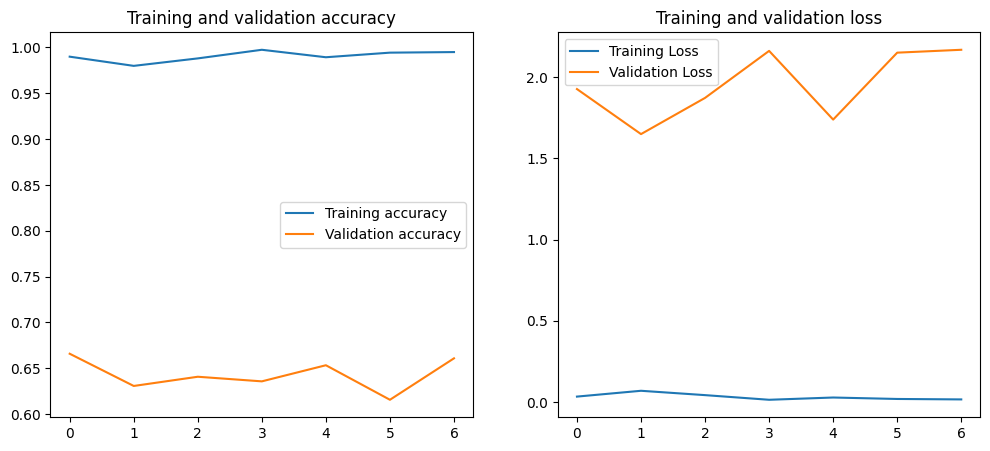

In [26]:
# Skapar datageneratorn för träningsdatan
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=4,
    verbose=1,
    restore_best_weights=True
)

# Tränar modellen med EarlyStopping och data augmentation
model_aug.fit(
    train_generator,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

# Testar modellen
test_loss, test_accuracy = model_aug.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
plot_training_history(history)


Jag har ju ändrat bildstorlekarna så det stämmer överens på alla, tagit bort de största respektive minsta för att minska möjligheten för knasiga bilder. Testat med augmentation och utan för att kunna se vad som fungerar bäst. Även testat öka och sänka convolution och Maxpooling lager för att se hur det påverkar.

# 2b

# Andra test med andra parametrar utan augmentering

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5919 - loss: 1.7338 - val_accuracy: 0.4975 - val_loss: 1.9732
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7487 - loss: 0.4745 - val_accuracy: 0.4975 - val_loss: 1.9482
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8678 - loss: 0.3280 - val_accuracy: 0.4975 - val_loss: 2.4623
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9302 - loss: 0.2260 - val_accuracy: 0.4975 - val_loss: 3.5454
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9404 - loss: 0.1760 - val_accuracy: 0.4975 - val_loss: 2.6380
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9548 - loss: 0.1372 - val_accuracy: 0.5201 - val_loss: 1.5064
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9558 - loss: 0.1161 - val_accuracy: 0.5377 - val_loss: 2.1225
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9619 - loss: 0.1077 - val_accuracy: 0.5251 - val_loss:

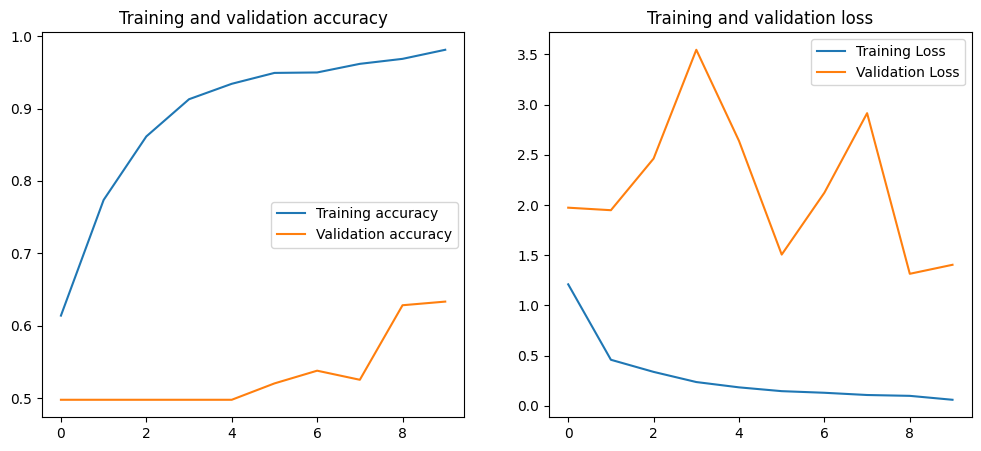

In [27]:

def build_model():
    model = Sequential([
        Input(shape=(250, 200, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.7),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = build_model()
model_plot = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Jämför modellen mot testdatan
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_training_history(model_plot)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9832 - loss: 0.0449 - val_accuracy: 0.6759 - val_loss: 1.0553
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9745 - loss: 0.0683 - val_accuracy: 0.6935 - val_loss: 1.0600
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9896 - loss: 0.0342 - val_accuracy: 0.6508 - val_loss: 1.2764
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9896 - loss: 0.0422 - val_accuracy: 0.6910 - val_loss: 1.0033
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9852 - loss: 0.0422 - val_accuracy: 0.7236 - val_loss: 0.9007
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9840 - loss: 0.0530 - val_accuracy: 0.6910 - val_loss: 0.9965
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9696 - loss: 0.0864 - val_accuracy: 0.6834 - val_loss: 1.0660
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9930 - loss: 0.0326 - val_accuracy: 0.6558 - val_loss

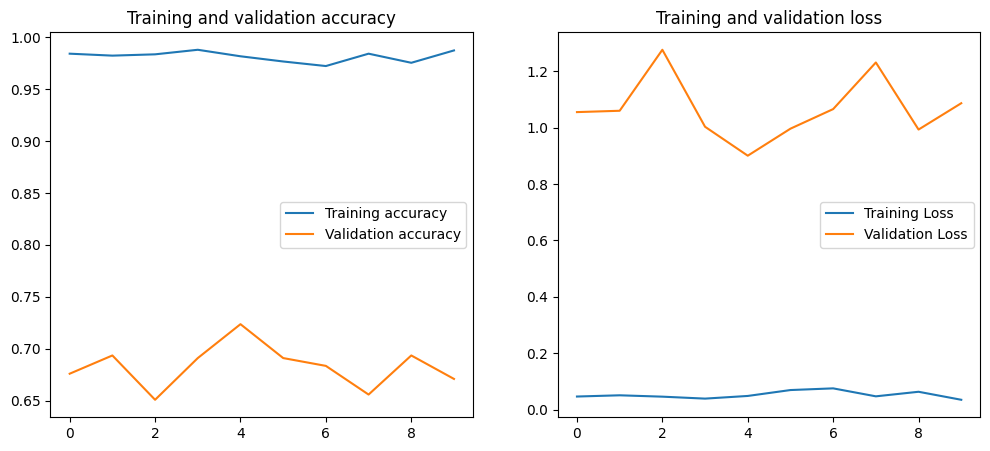

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7287 - loss: 0.9603
Test Accuracy: 0.7314629554748535


In [28]:
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopper]
)

plot_training_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Här testade jag att lägga till Batch Normalization för att se om det kunde normalisera inputen till varje lager så att nätverket kan träna snabbare och mer stabilt.

Jag justerade antalet filter och lagrens storlek för att fånga fler detaljer från bilderna. Ändrade också storleken på de dolda lagren för att testa om det förbättrade modellens kapacitet att lära sig mer komplexa funktioner.

Fick ett lite bättre resultat än vid första testet.

# 2c) Utvärdera Modellen på Testdata

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step
Classification Report:
               precision    recall  f1-score   support

         Cat       0.69      0.83      0.76       249
         Dog       0.79      0.63      0.70       250

    accuracy                           0.73       499
   macro avg       0.74      0.73      0.73       499
weighted avg       0.74      0.73      0.73       499

Confusion Matrix:
 [[207  42]
 [ 92 158]]


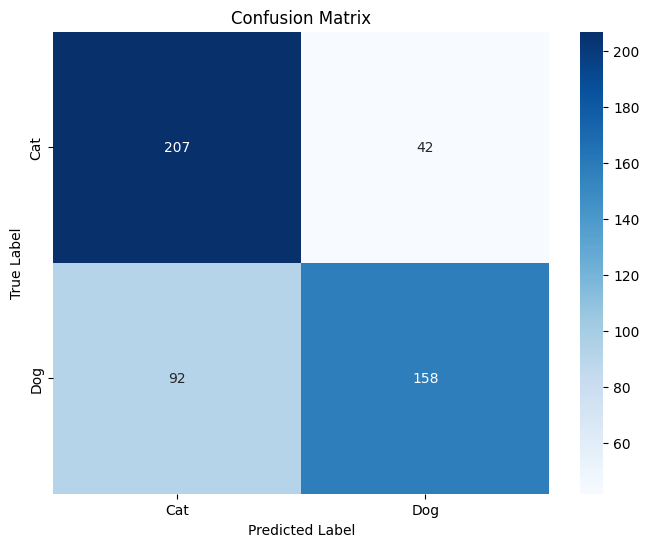

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Förutsäger klasserna (inte sannolikheten pga sigmoid)
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# De verkliga klasserna
true_classes = y_test

# Beräknar classification rapporten
class_report = classification_report(true_classes, predicted_classes, target_names=['Cat', 'Dog'])
print("Classification Report:\n", class_report)

# Skapar en confusion matris
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Plottar confusion matris
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Men denna evalueringen så ser vi att den är bättre på att predicta katter än hundar men resultatet är ändå okej. Man kan säkert gå igenom datan och rensa ytterlligare men jag valde att inte göra det för att testa vad systemet kan göra. Även att se hur väl systemet kan predikta även med knasiga bilder. Jag tänker bl.a. på när man ska bekräfta saker på nätet och man får "tryck i alla rutor som innehåller en bil" t.ex. och tänker att detta kan bli ungefär samma princip.

# 2d) Sammanfattning av Forskningsartiklar och Transfer Learning

Forskning om Djupa Nätverk:

- VGG16: Forskare vid Oxford (Visual Geometry Group) utvecklade detta nätverk. Det är känt för sin djuphet och enkelhet, använder enbart 3x3 konvolutionella filter stegvis följt av max pooling, vilket gör det bra för grundläggande bildigenkänning men det är ganska tungt i antalet parametrar.

- ResNet (Residual Networks): Är känd för sin förmåga att köra mycket djupa nätverk tack vare residuala block, med skip connections som tillåter tränande av mycket djupare nätverk (upp till 152 lager) genom att lösa problemet med vanishing gradients. Detta kan vara effektivt för mycket komplexa bildproblem.

- Xception använder separerbara konvolutioner som kan vara mer effektivt i termer av modellens prestanda på stora datamängder.

- Inception (InceptionV3) är bra på att hantera olika skalförändringar inom bilder tack vare sina konvolutionsblock som kör parallellt.

- Transfer Learning: Denna teknik innebär att man tar en förtränad modell (som VGG16, ResNet, etc.) tränad på en stor databas, och sedan finjustera den för en mer specifik uppgift. Detta är effektivt eftersom de tidiga lagren av en CNN fångar universella funktioner som kanter och texturer som är användbara över olika bildigenkänningsuppgifter. 
    

In [30]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Laddar in ett förtränat nätverk men utan toppskikten
base_model = Xception(weights='imagenet', include_top=False, input_shape=(200, 250, 3))

# Fryser vikterna i basmodellen
for layer in base_model.layers:
    layer.trainable = False

# Skapar den nya modellen med anpassade toppskikt
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilerar modellen
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Här tränas modellen
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Plotta träningshistorik
import pandas as pd
import matplotlib.pyplot as plt

metrics = pd.DataFrame(history.history)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8949 - loss: 0.2133 - val_accuracy: 0.9925 - val_loss: 0.0193
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9752 - loss: 0.0519 - val_accuracy: 0.9849 - val_loss: 0.0339
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9855 - loss: 0.0386 - val_accuracy: 0.9925 - val_loss: 0.0199
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9902 - loss: 0.0225 - val_accuracy: 0.9925 - val_loss: 0.0182
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9965 - loss: 0.0135 - val_accuracy: 0.9874 - val_loss: 0.0397
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9899 - val_loss: 0.0242
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9923 - loss: 0.0200 - val_accuracy: 0.9899 - val_loss: 0.0311
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9885 - loss: 0.0219 - val_accuracy: 0.9975 - val_los

### Ovan kod fungerar inte riktigt som jag vill och visar inga trainable paramaters ( för att jag fryst dem) Så kan inte kontrollera resultatet lika väl.

Men jag tror att det går att ordna bättre om man justerar lite parametrar som nedan.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 8, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,386,281 (81.58 MB)

 Trainable params: 3,688,449 (14.07 MB)

 Non-trainable params: 17,697,832 (67.51 MB)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9307 - loss: 0.1609 - val_accuracy: 0.9899 - val_loss: 0.0200
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9928 - loss: 0.0195 - val_accuracy: 0.9950 - val_loss: 0.0373
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9971 - loss: 0.0105 - val_accuracy: 0.9925 - val_loss: 0.0314
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9925 - val_loss: 0.0311
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 1.0000 - loss: 9.3976e-04 - val_accuracy: 0.9899 - val_loss: 0.0426
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 4.4358e-04 - val_accuracy: 0.9874 - val_loss: 0.0501
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9989 - loss: 0.0016 - val_accuracy: 0.9874 - val_loss: 0.0530
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.

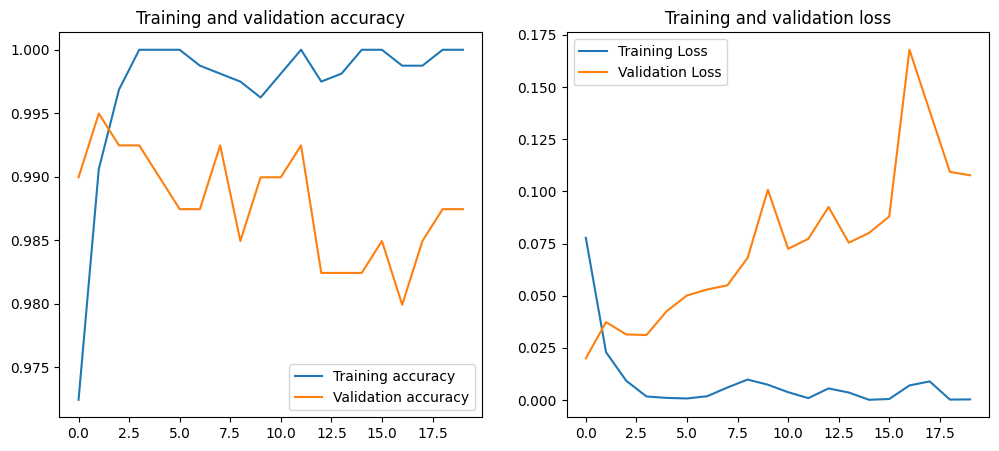

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9963 - loss: 0.0283
Test Accuracy: 0.9899799823760986


In [31]:
# Laddar ett förtränat nätverk (Xception) men utan toppskikten
base_model = Xception(weights='imagenet', include_top=False, input_shape=(200, 250, 3))

# Fryser vikterna i basmodellen förutom de sista tre 
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Gör de sista tre lagren tränbara för att finjustera modellen på min specifika data
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Skapar den nya modellen med anpassade toppskikt
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Bygger modellen manuellt för att definiera output shapes för att kunna se en mer detaljerad och korrekt sammanfattning av modellen. Då inklusive tränbara parametrar och output shapes för varje lager
model.build(input_shape=(None, 200, 250, 3))
model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

plot_training_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")